## Distributions and Regression: California Housing Dataset

### Objective
This assignment aims to apply summarization, distribution analysis, correlational analysis, and linear regression to the California Housing dataset to understand and predict median house values across California districts.

### Setup and Requirements
First, ensure you have installed the necessary Python libraries and load the California Housing dataset.

In [237]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [238]:
# Load the California Housing dataset
housing = fetch_california_housing()

## 1. Dataset Exploration

Understand the dataset's structure through summarization.

### Exercise 1: Dataset Overview

Explore the dataset to grasp its structure, summarizing key statistics.

In [239]:
# Display the first few rows and describe the dataset
# Code comes here

# Display the first few rows
housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])
housing_df['MedHouseVal'] = housing['target']
housing_df.head(6)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [240]:
# Describe the dataset
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 2. Distribution Analysis

Examine the distributions of significant variables.

### Exercise 2A: Histograms and Skewness

Investigate the distributions of `MedInc` (median income) and `HouseAge` using histograms.

<Axes: xlabel='MedInc', ylabel='Count'>

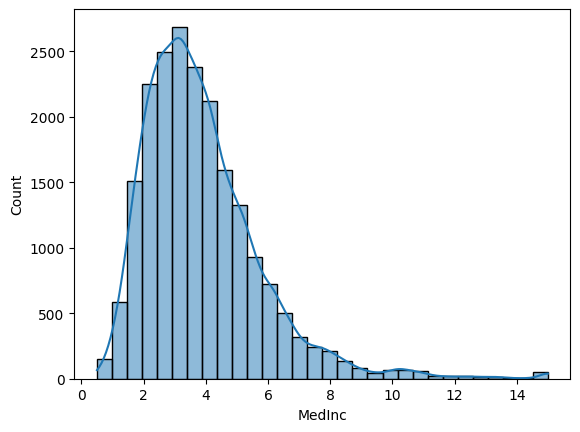

In [241]:
# Code comes here

# The distribution of MedInc
sns.histplot(data=housing_df,x='MedInc',bins=30, kde=True)

<Axes: xlabel='HouseAge', ylabel='Count'>

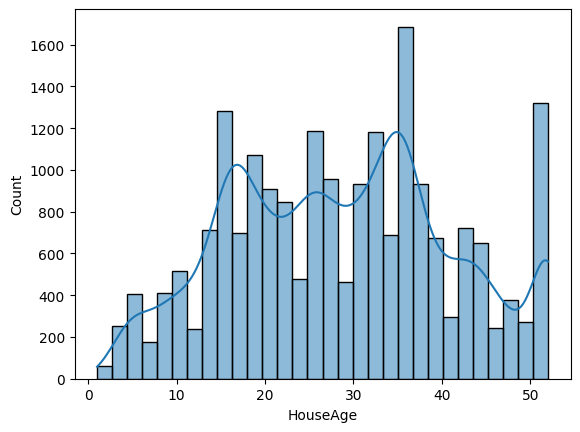

In [243]:
# The distribution of HouseAge
sns.histplot(data=housing_df,x='HouseAge', bins=30, kde=True)

**Interpretaton question 1:**

Discuss the skewness observed in the variables and its implications.

Answer here:

In the first graph, it shows a positive skewness.It means that the median income in block group is between $200000 to $600000 at that time which means the price of most houses in this block group is at a relatively low level.
In the second graph, there appears a negative skewness. According to this graph, we can know that the age of most houses in this block group is mainly over 30 years.

### Exercise 2B: Frequency Distribution

Generate a frequency distribution for the `AveRooms` (average number of rooms per household).

In [ ]:
# Code comes here
AveRooms_dist = housing_df['AveRooms'].value_counts() 
print(AveRooms_dist) 

AveRooms
5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: count, Length: 19392, dtype: int64


## 3. Correlational Analysis

Identify relationships between variables.

### Exercise 3: Correlational Plot

Examine the relationship between `MedInc` and `MedHouseVal` with a scatter plot and regression line.

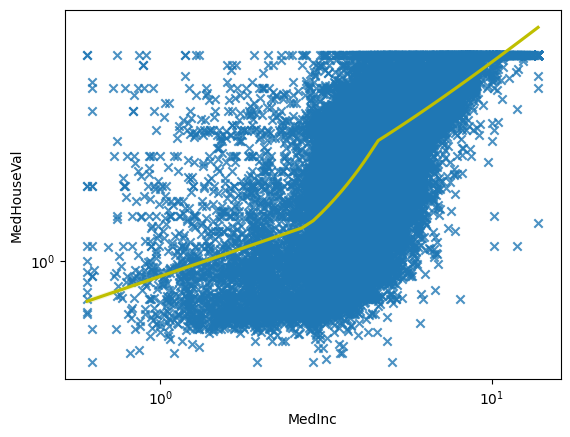

In [ ]:
# Code comes here
sns.regplot(data=housing_df,x='MedInc',y='MedHouseVal',line_kws=dict(color="y"),marker='x')
plt.xscale('symlog')
plt.yscale('symlog')

## 4. Linear Regression Analysis

Predict median house values using regression models.

### Exercise 4A: Simple Linear Regression

Model `MedHouseVal` using `MedInc` as a predictor.

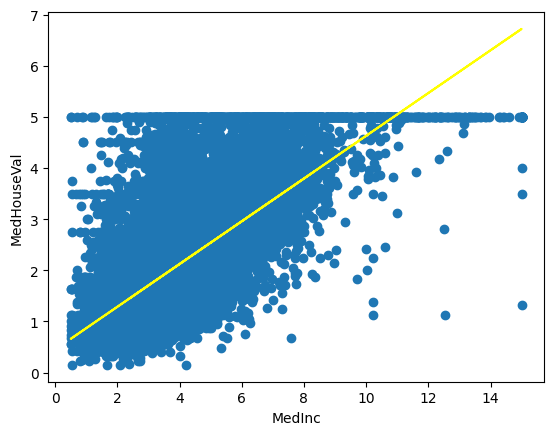

In [ ]:
# Code comes here
MedHouseVal = housing_df['MedHouseVal']
MedInc = housing_df['MedInc']
s_result = stats.linregress(MedInc, MedHouseVal)

def myfunc_1(x):
  return s_result.slope * x + s_result.intercept

mymodel = list(map(myfunc_1, MedInc))

plt.scatter(MedInc, MedHouseVal)
plt.plot(MedInc, mymodel,color='yellow')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()

**Interpretaton question 2:**

In the context of predicting median house values (MedHouseVal) using the predictor MedInc in a simple linear regression model:

What insights can you derive from the coefficient of the predictor variable (MedInc) in terms of its impact on the predicted median house values?

How would you interpret the intercept of the regression model in the context of the housing data?

Can you anticipate any limitations or assumptions associated with using a simple linear regression model for predicting house values based on income?

Answer comes here:

1. It can be seen from the figure that there is a positive correlation between the two. As income increases, the value of houses will also increase.
2. In my opinion, the intercept means the original value of houses.
3. Yes. Simple linear regression assumes a linear relationship between the income and the house value. However, this might not always be the case. The relationship could be non-linear, and using a linear model may result in biased predictions.This could be one of the limitations. For the assumption, linear regression assumes constant variance of errors across all levels of the independent variable. In the context of predicting house values, the variance of house prices might not be constant across different income levels. For example, the variability in house prices might increase as income increases, violating the homoscedasticity assumption.

### Exercise 4B: Multiple Linear Regression

Expand the model to include more predictors, such as `HouseAge` and an interaction term between `MedInc` and `HouseAge`. This is multivariate regression, that will be presented in second year.

In [ ]:
# Code comes here
X = housing_df[['MedInc','HouseAge']]
y = housing_df['HouseAge']

# Split datasets into train and test
X_train = X[:int(len(X)*0.8)]
X_test = X[:int(len(X)*0.2)]
y_train = y[:int(len(y)*0.8)]
y_test = y[:int(len(X)*0.2)]

# Make model with train dataset
line_model = LinearRegression().fit(X_train, y_train)
y_pred = line_model.predict(X_test)

## 5. Model Evaluation and Interpretation

Validate model assumptions and assess its performance.

### Exercise 5A: Checking Assumptions (2 points)

Analyze residuals versus fitted values to check model assumptions.

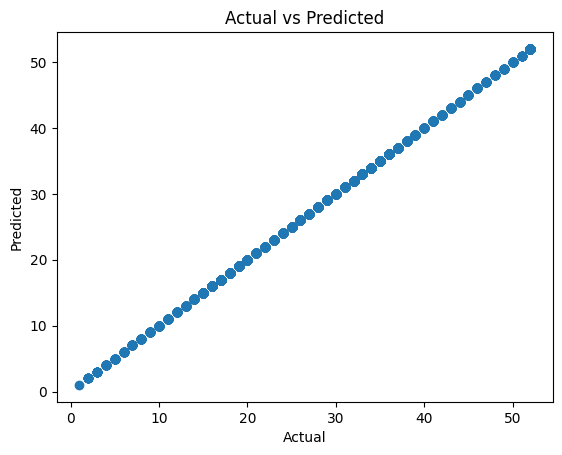

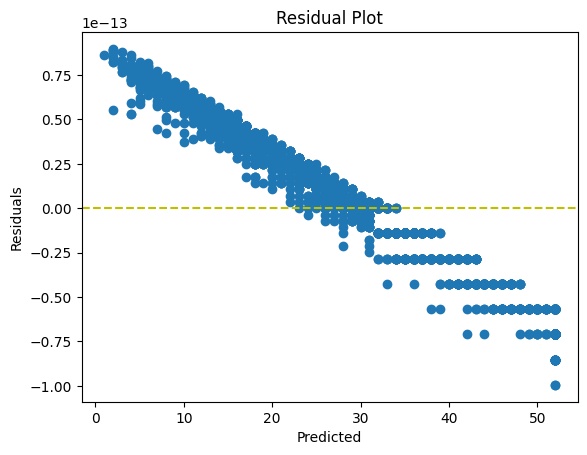

In [ ]:
# Code comes here

# Draw the graph of test dataset and predicted dataset
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Calculate residuals between real and predicted data and plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='y', linestyle='--')
plt.show()


**Interpretaton question 3:**

Certainly! Here's an interpretative exercise for Exercise 5A on checking assumptions through analyzing residuals versus fitted values:

**Exercise: Residual Analysis and Model Assumptions**

1. **Residual Patterns:** After analyzing the residuals versus fitted values plot, describe any discernible patterns. What do specific patterns (if present) suggest about the relationship between the predictor variables and the response variable? Consider the implications of these patterns on the validity of the linear regression model.

2. **Homoscedasticity vs. Heteroscedasticity:** Assess whether the spread of residuals is consistent across all levels of fitted values (homoscedasticity) or if there are variations in the spread (heteroscedasticity). Discuss the potential consequences of homoscedasticity or heteroscedasticity on the reliability of predictions and the interpretation of coefficients.

3. **Normality of Residuals:** Reflect on the normality of residuals. How might deviations from normality impact the reliability of statistical inferences drawn from the model? Discuss potential strategies for addressing non-normality, if observed.

Answer here:

1. The pattern of the graph looks like an unary function. It suggests that the relationship between the predictor variables and the response variables may be more complex than assumed in the regression model. This kind of patterns suggests that the level of the validity of the linear regression is very low. It violates the assumption of constant error variance, leading to biased parameter estimates, incorrect standard errors, and invalid statistical inferences.
2. In the second graph of this question, it shows the heteroscedasticity. The spread of residuals changes with the values of the independent variables, indicating that the variance of the errors is not constant. It can lead to biased coefficient estimates, inaccurate predictions, and incorrect interpretations of the relationships between 
3. Residuals in this model are not normal. Deviations from normality in the distribution of residuals can compromise the reliability of statistical inferences drawn from a model, potentially leading to biased parameter estimates, incorrect confidence intervals, inaccurate hypothesis tests, and flawed predictions. 

**Interpretaton question 4:**

Reflect on the meaning of "predict" in the context of linear regression, especially in relation to the California Housing dataset.

Answer here:

In the context of linear regression, "predict" refers to estimating or forecasting the value of a dependent variable based on the values of one or more independent variables. In the case of the California Housing dataset, the target of using linear regression might be to predict the housing values (the dependent variable) based on various features(column names in the dataset).